In [83]:
#import the required modules
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

#### PHASE 1

#### Define the required functions to be used

In [84]:
##Create a 10*10 grid for evaluation

def create_grid(len):
    #create a grid of specified size
    G =nx.grid_2d_graph(len,len)

    #Create a list with diagonal edges
    diag_edges = [((x,y),(x+1,y+1)) for x in range(9) for y in range(9)]

    #Add the edges to the graph G
    G.add_edges_from(diag_edges) 
    
    return G


def draw_path(obslist, path_nodes):
    #Create a 10*10 grid for plotting the figure
    G =nx.grid_2d_graph(10,10)
    plt.figure(figsize=(10,10))

    # pos is the dictionary with nodes as keys and positions as values
    pos = dict(zip(G,G))
    
    # create the list of edges corresponding to the path to be plotted in the graph
    path_edges = list(zip(path_nodes,path_nodes[1:]))

    #Draw the defined graph G with obstacles and the edges connecting to it removed.
    nx.draw(G, pos=pos, node_color='lightgreen',with_labels=True,node_size=600)

    #Show the shortest path to reach the destination
    nx.draw_networkx_nodes(G,pos,nodelist=obslist,node_color='b')
    nx.draw_networkx_nodes(G,pos,nodelist=path_nodes,node_color='r')
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)

In [85]:
#Create a 10*10 grid for evaluation
G1 = create_grid(10)

In [86]:
#user-input -> starting point
start_inp = str(input("Enter the starting node:"))


if start_inp=='':
    #if empty, define starting point as given in the qn
    start=(0,0)
else:
    #convert to tuple
    start=eval(start_inp)
    
#user-input -> ending point
end_inp = str(input("Enter the ending node:"))

if end_inp=='':
    #if empty, define ending point as given in the qn
    end=(9,9) 
else:
    #convert to tuple
    end=eval(end_inp)

#create an empty list to append the nodes with obstacles
obslist=[]

while True:
    obst = str(input("Enter the locations of obstacles:"))
    if obst == '':
        #when empty, break out of the loop
        break
    else:
        #append the given coordinates into obslist
        obslist.append(eval(obst))
        
if obslist==[]:
    #if empty, define the list of obstacles as given in the qn
    obslist=[(9,7),(8,7),(7,7),(7,8)]

#print(start,end,obslist)

Enter the starting node:
Enter the ending node:
Enter the locations of obstacles:


In [87]:
#remove all the obstacle nodes from the graph
G1.remove_nodes_from(obslist)

In [88]:
#!pip install bellmanford - module

#import the library
import bellmanford as bf

#Save the length of the shortest path and the shortest path
path_len, path_nodes, _ = bf.bellman_ford(G1, source=start, target=end)

print(f"Shortest path length: {path_len}")
print(f"Shortest path: {path_nodes}")

Shortest path length: 11
Shortest path: [(0, 0), (0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 9), (9, 9)]


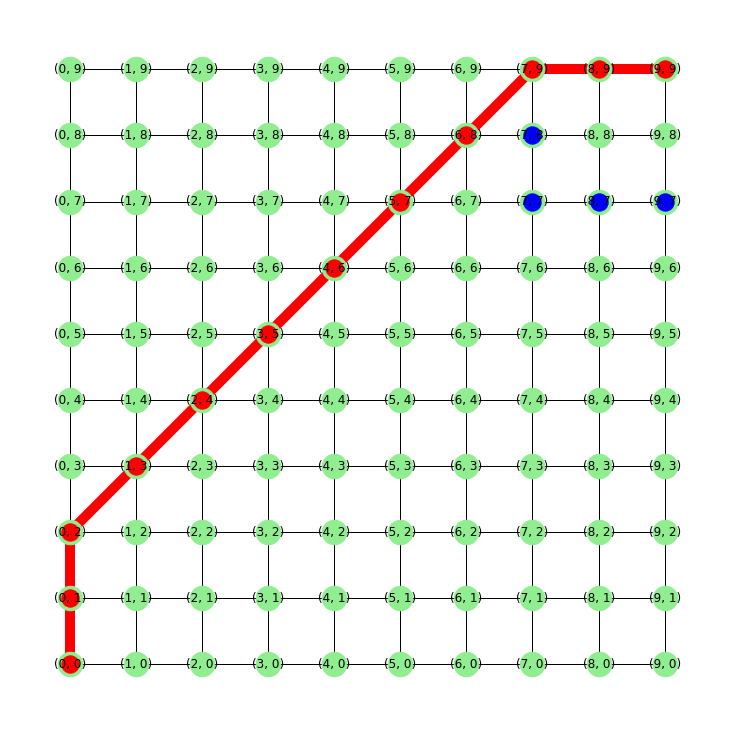

In [89]:
draw_path(obslist, path_nodes)

#### PHASE 2 - Generating obstacles randomly

In [137]:
from random import sample

#Create the graph
G2 = create_grid(10)

start = (0,0)

end = (9,9)

#input the desired amount of obstacles
obst_n = int(input("Number of obstacles:"))

#create a random list of obstacles
random_obst = sample(list(G2.nodes()), obst_n)

#Remove all the obstacle nodes from the graph
G2.remove_nodes_from(random_obst)

Number of obstacles:7


In [138]:
#Find the shortest path and path length
path_len, path_nodes, _ = bf.bellman_ford(G2, source=start, target=end)

print(f"Shortest path length: {path_len}")
print(f"Shortest path: {path_nodes}")

Shortest path length: 10
Shortest path: [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 8), (9, 9)]


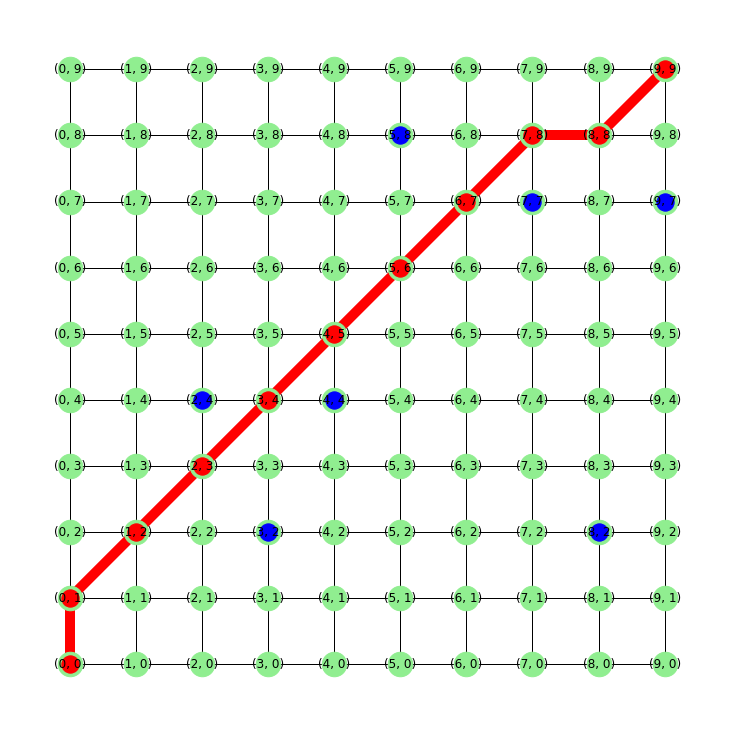

In [139]:
draw_path(random_obst, path_nodes)

#### BONUS

In [94]:
import itertools

#Define a function to find all the possible sublists of the obstacle list
def find_obs(obs):
    obslis=[]
    #append all the sublists of length 1
    for i in obs:
        obslis.append([i])
    #append all the other sublists
    for i in range(1,len(obs)):
        k = itertools.combinations(obs, i)
        for j in k:
            obslis.append(list(j))
    return obslis

In [95]:
#Define the function to check how many obstacles must be removed to reach the destination
def obst_rem(start,end,obs):
    rem_obs_list = []
    flag = False
    #find all the possible sublists from obs
    obs1=find_obs(obs)
    for i in obs1:
        #store the coordinates from obs that is not in i
        obst_list1 = [x for x in obs if x not in i]
        #Create the graph
        G3 =create_grid(10)
        #All the nodes apart from the sublist will be removed
        G3.remove_nodes_from(obst_list1)
        #Find the shortest path from G
        path_len, path_nodes, _ = bf.bellman_ford(G3, source=start, target=end)
        #if the destination cannot be reached, the path_nodes will be an empty list
        if path_nodes!=[]:
            #the algorithm can find a shortest path when removing the mentioned obstacles
            #set the flag as True
            flag=True
            #Draw the graph and the path
            pos = dict(zip(G3,G3))
            path_edges = list(zip(path_nodes,path_nodes[1:]))
            draw_path(obst_list1, path_nodes)
            nx.draw_networkx_nodes(G3,pos,nodelist=i,node_color='y')
            return i
        else:
            #if the path_nodes is empty, set obst_list1 as empty and continue the process
            obst_list1 =[]
            continue

In [96]:
G4=create_grid(10)

In [97]:
#Set the starting point, ending point, and the nodes with obstacles
start = (0,0)
end = (9,9)
obst_list = [(8,9),(8,8),(9,8),(7,9),(7,8),(7,7),(8,7),(9,7)]

#remove the obstacles from the graph
G4.remove_nodes_from(obst_list)

In [98]:
path_len, path_nodes, _ = bf.bellman_ford(G4, source=start, target=end)

print(f"Shortest path length: {path_len}")
print(f"Shortest path: {path_nodes}")

Shortest path length: inf
Shortest path: []


In [99]:
#Since there is no path that can be found in the case, we will get an empty set
if path_nodes==[]:
    print("Unable to reach delivery point")

Unable to reach delivery point


[(8, 9), (7, 9)]
The minimum number of obstacles to be removed is 2
The removed obstacles are highlighted in yellow


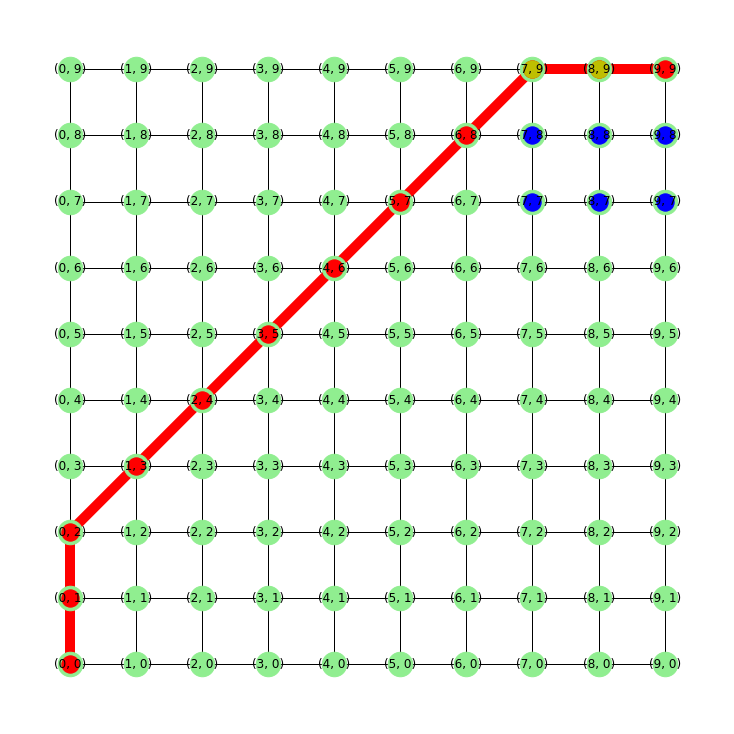

In [100]:
rem_obst = obst_rem(start,(9,9),obst_list)
print(rem_obst)
print(f"The minimum number of obstacles to be removed is {len(rem_obst[0])}")

print('\033[1m' + "The removed obstacles are highlighted in yellow" + '\033[0m')

#### References

1.https://networkx.org/documentation/stable/auto_examples/graphviz_drawing/plot_grid.html \
2.https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html \
3.https://docs.python.org/3/library/itertools.html \
4.https://stackoverflow.com/questions/60164893/highlighting-certain-nodes-edges-in-networkx-issues-with-using-zip \
5.https://stackoverflow.com/questions/35109590/how-to-graph-nodes-on-a-grid-in-networkx